In [1]:
import numpy as np
import time
import math

In [2]:
def loadDataSet(file_name, label_existed_flag):
    feats = []
    labels = []
    fr = open(file_name)
    lines = fr.readlines()
    for line in lines:
        temp = []
        allInfo = line.strip().split(',')
        dims = len(allInfo)
        if label_existed_flag == 1:
            for index in range(dims-1):
                temp.append(float(allInfo[index]))
            feats.append(temp)
            labels.append(float(allInfo[dims-1]))
        else:
            for index in range(dims):
                temp.append(float(allInfo[index]))
            feats.append(temp)
    fr.close()
    feats0 = np.array(feats)
    labels0 = np.array(labels)
    return feats0, labels0

In [3]:
train_file =  "data/train_data.txt"
test_file = "data/test_data.txt"
predict_file = "projects/student/result.txt"

In [4]:
feats_tran, labels_tran = loadDataSet(train_file, 1)
feats_test, labels_predict = loadDataSet(test_file, 0)

In [5]:
answer_file = "answer.txt"

In [6]:
feats_answer, labels_answer = loadDataSet(answer_file, 1)

labels_answer

In [21]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

In [28]:
print(labels_tran[0])
print(labels_tran[-1])

0.0
1.0


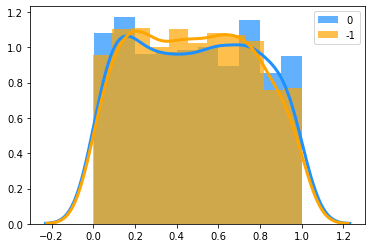

In [30]:
# Draw Plot
# plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(feats_tran[0], color="dodgerblue", label="0", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(feats_tran[-1], color="orange", label="-1", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
# plt.ylim(0, 0.35)

# Decoration
# plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

In [38]:
# for i in range(10):
print(labels_tran[0:100])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 1. 1.]


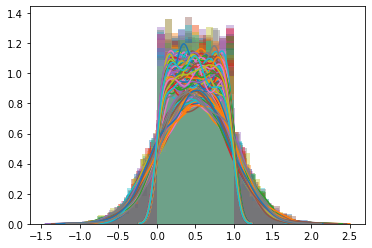

In [44]:
for i in range(1000):
    if labels_tran[i] == 0:
        sns.distplot(feats_tran[i])
plt.show()

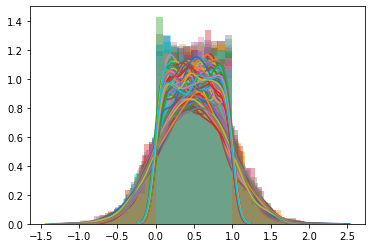

In [45]:
for i in range(1000):
    if labels_tran[i] == 1:
        sns.distplot(feats_tran[i])
plt.show()

# 时域频域

sig_1 = feats_tran[0]

Fs = 1  # sampling_rate
N = len(sig_1)  # N = sig_RH.size
dT = 1/Fs  # inverse of the sampling rate
t_sig = np.arange(start=0.0, stop=N/Fs, step=dT)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(t_sig, sig_1)  # 绘图
plt.show()

#频域
from scipy.fftpack import fft
x = np.linspace(0.0, 1.0/(2.0*dT), int(N/2))  # 时间向量
#FFT algorithm
yr_fft = fft(sig_1)  # "raw" FFT with both + and - frequencies
y_fft = 2/N * np.abs(yr_fft[0: np.int(N/2)])  # positive freqs only

y_fft[0] = 0

#Plotting the results
#fig, ax = plt.subplots(1, 1, figsize=(20, 15))
fig, ax = plt.subplots()#1, 1)#, figsize=(7.5, 5))
plt.plot(x, y_fft)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Vibration (g)')
plt.title('Frequency Domain (sig 1)')
plt.show()

# 时域统计特征

In [8]:
import pandas as pd
import scipy.stats
import numpy as np
from sklearn.metrics import mean_squared_error

In [9]:
class ExtractTimeFeatures:
    def __init__(self, z, name='z'):
        if type(z) is type(pd.DataFrame([1])):
            z = z.values
        if type(z) is not type(np.array([1])):
            try:
                z = np.array(z)
            except TypeError:
                print("The type of z must be 'numpy.ndarray' or 'pandas.core.frame.DataFrame'")

        self.c = []  # all feature names
        self.z = z  # input dataset whose type is 'np.array'
        self.name = '_' + name  # dataset name
        self._df = []  # return new dataset which includes every feature name

    def extracttimefeatures(self):
        max_z = self.get_max()
        min_z = self.get_min()
        range_z = self.get_range()
        mean_z = self.get_mean()
        median_z = self.get_median()
        mode_z = self.get_mode()
        std_z = self.get_std()
        rms_z = self.get_rms()
        ms_z = self.get_ms()
        k_center_z = self.get_k_order_moment(is_center=True)
        k_origin_z = self.get_k_order_moment(is_origin=True)
        skew_z = self.get_skew()
        kurt_z = self.get_kurt()
        kurt_factor_z = self.get_kurt_factor()
        wave_factor = self.get_wave_factor()
        pulse_factor_z = self.get_pulse_factor()
        margin_factor_z = self.get_margin_factor()

        self._df = pd.DataFrame([
            max_z, min_z, range_z, mean_z, median_z, mode_z, std_z,
            rms_z, ms_z, k_center_z, k_origin_z, skew_z, kurt_z,
            kurt_factor_z, wave_factor, pulse_factor_z, margin_factor_z
        ], self.c).transpose()
        return self._df

# Dimensional time domain feature
    def get_max(self):
        self.max_z = np.max(self.z, axis=1)
        self.c.append('max'+self.name)
        return self.max_z

    def get_min(self):
        self.min_z = np.min(self.z, axis=1)
        self.c.append('min' + self.name)
        return self.min_z

    def get_range(self):
        self.range_z = self.max_z-self.min_z
        self.c.append('range' + self.name)
        return self.range_z

    def get_mean(self):
        self.mean_z = np.mean(self.z, axis=1)
        self.c.append('mean' + self.name)
        return self.mean_z

    def get_median(self):
        self.median_z = np.median(self.z, axis=1)
        self.c.append('median' + self.name)
        return self.median_z

    def get_mode(self):
        self.mode_z = scipy.stats.mode(self.z, axis=1)[0].reshape([-1])
        self.c.append('mode' + self.name)
        return self.mode_z

    def get_std(self):
        self.std_z = np.std(self.z ,axis=1)
        self.c.append('std' + self.name)
        return self.std_z

    def get_rms(self):
        rms_z = [np.sqrt(mean_squared_error(zi, np.zeros(len(zi)))) for zi in self.z]
        self.rms_z = np.array(rms_z)
        self.c.append('rms' + self.name)
        return self.rms_z

    def get_ms(self):
        ms_z = [mean_squared_error(zi, np.zeros(len(zi))) for zi in self.z]
        self.ms_z = np.array(ms_z)
        self.c.append('ms' + self.name)
        return self.ms_z

    def get_k_order_moment(self, k=3, is_center=False, is_origin=False):
        moment_name, self.moment_z = self.k_order_moment(self.z, k,
                                                         is_center, is_origin)
        self.c.append(moment_name + self.name)
        return self.moment_z

    @staticmethod
    def k_order_moment(z, k, is_center, is_origin):
        """
        Calculate k-order center moment and k-order origin moment of z
        :param z: array_like
        :param k: int
        :param is_center: bool; whether calculate k-order center moment
        :param is_origin: bool; whether calculate k-order origin moment
        :return: tuple; return k-order center moment or k-order origin moment
        """
        if (is_center is False) and (is_origin is False):
            raise ValueError("At least one of is_center and is_origin is True")
        if (is_center is True) and (is_origin is True):
            raise ValueError("At most one of is_center and is_origin is True")
        if (type(k) is not int) or (k < 0):
            raise TypeError("k must be a integrate and more than 0")
        if type(z) is list:
            z = np.array(z)

        mean_z = np.mean(z, axis=1)
        if is_origin is False:
            k_center = np.mean([(z[i] - mean_z[i]) ** k for i in range(z.shape[0])], axis=1)
            return str(k)+'_order_center', k_center
        if is_center is False:
            k_origin = np.mean([z[i] ** k for i in range(z.shape[0])], axis=1)
            return str(k)+'_order_origin', k_origin

# Dimensionless time domain feature
    def get_skew(self):
        self.skew_z = pd.DataFrame(self.z.transpose()).skew().values
        self.c.append('skew' + self.name)
        return self.skew_z

    def get_kurt(self):
        self.kurt_z = pd.DataFrame(self.z.transpose()).kurt().values
        self.c.append('kurt' + self.name)
        return self.kurt_z

    def get_kurt_factor(self):
        self.kurt_factor_z = self.max_z/self.rms_z
        self.c.append('kurt_factor' + self.name)
        return self.kurt_factor_z

    def get_wave_factor(self):
        self.wave_factor_z = self.rms_z/self.mean_z
        self.c.append('wave_factor' + self.name)
        return self.wave_factor_z

    def get_pulse_factor(self):
        self.pulse_factor_z = self.max_z/abs(self.mean_z)
        self.c.append('pulse_factor' + self.name)
        return self.pulse_factor_z

    def get_margin_factor(self):
        self.margin_factor_z = self.max_z/self.ms_z
        self.c.append('margin_factor' + self.name)
        return self.margin_factor_z

In [10]:
c = ExtractTimeFeatures(feats_tran)

f_tran = c.extracttimefeatures()

In [11]:
c1 = ExtractTimeFeatures(feats_test)

f_test = c1.extracttimefeatures()

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr.fit(f_tran, labels_tran)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
label_p = lr.predict(f_test)

In [15]:
print(label_p)

[0. 0. 0. ... 0. 0. 0.]


In [16]:
label_p.mean()

0.0

In [17]:
score = lr.score(f_test, labels_answer)
score

0.687

In [18]:
print(labels_answer)

[0. 1. 0. ... 0. 1. 0.]


count = 0
Length = len(label_answer)
for i in range(Length):
    if classifier.predict(sample_answer)[i] != label_test[i]:  # 预测测试样本
        count += 1

# Building the decision tree - OpenCV

Building the decision tree with OpenCV works in much the same way as in Chapter 3, First Steps in Supervised Learning. Recall that all machine learning function reside in OpenCV's ml module. You can create an empty decision tree using the following code:

import cv2
dtree = cv2.ml.DTrees_create()

Before training the model, we are going to make a slight change in the default parameters of the tree. 

dtree.setCVFolds(0) # Default value is 10 and a non-zero value causes core dump
dtree.setMaxDepth(8) # Default value is INT_MAX

Then train the model:

dtree.train(feats_tran, cv2.ml.ROW_SAMPLE, labels_tran.T)

# Building the decision tree - sklearn

In [74]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()

In [75]:
dtc.fit(feats_tran, labels_tran)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Since we did not specify any pre-pruning parameters, we would expect this decision tree to grow quite large and result in a perfect score on the training set:

In [76]:
dtc.score(feats_tran, labels_tran)

1.0

However, to our surprise, the test error is not too shabby, either:

In [77]:
dtc.score(feats_test, labels_answer)

0.5685

In [79]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file=f)

Now we want to do some model exploration. For example, we mentioned above that the depth of a tree influences its performance. If we wanted to study this dependency more systematically, we could repeat building the tree for different values of `max_depth`:

In [80]:
import numpy as np
# max_depths = np.array([1, 2, 3, 5, 7, 9, 11])

In [113]:
np.arange(10)+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

For each of these values, we want to run the full model cascade from start to finish. We also want to record the train and test scores. We do this in a for loop:

In [82]:
train_score = []
test_score = []
for d in max_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=d, random_state=42)
    dtc.fit(feats_tran, labels_tran)
    train_score.append(dtc.score(feats_tran, labels_tran))
    test_score.append(dtc.score(feats_test, labels_answer))

We can plot the scores as a function of the tree depth using Matplotlib:

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

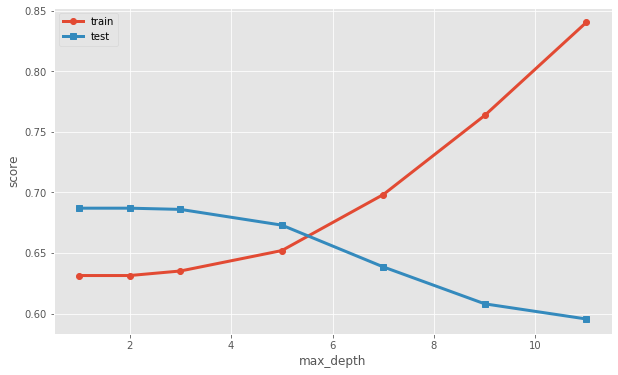

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
# plt.ylim(0.85, 1.1)
plt.legend()

Let's do one more. What about the minimum numbers of samples required to make a node a leaf node?

We repeat the procedure from above:

In [86]:
train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])
for s in min_samples:
    dtc = tree.DecisionTreeClassifier(min_samples_leaf=s, random_state=42)
    dtc.fit(feats_tran, labels_tran)
    train_score.append(dtc.score(feats_tran, labels_tran))
    test_score.append(dtc.score(feats_test, labels_answer))

This leads to a plot that looks quite different from the one before:

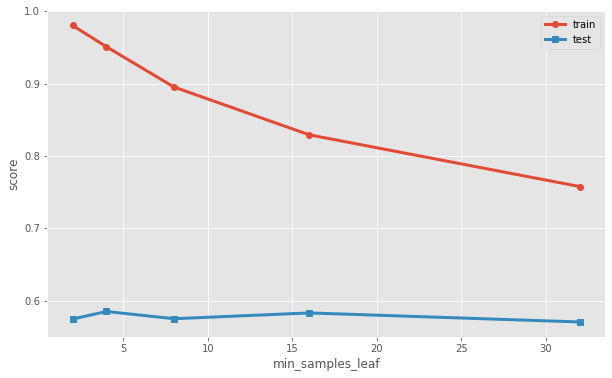

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_samples, test_score, 's-', linewidth=3, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
# plt.ylim(0.9, 1)
plt.legend()

What does this all mean? Refer to Chapter 5 of the book for the answers.

## 自测试

In [88]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(
    feats_tran, labels_tran, test_size=5, random_state=42
)

In [89]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier(random_state=42)

In [90]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Since we did not specify any pre-pruning parameters, we would expect this decision tree to grow quite large and result in a perfect score on the training set:

In [91]:
dtc.score(X_train, y_train)

1.0

However, to our surprise, the test error is not too shabby, either:

In [92]:
dtc.score(X_test, y_test)

0.6

In [103]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file=f)

Now we want to do some model exploration. For example, we mentioned above that the depth of a tree influences its performance. If we wanted to study this dependency more systematically, we could repeat building the tree for different values of `max_depth`:

In [104]:
import numpy as np
max_depths = np.array([1, 2, 3, 5, 7, 9, 11])

For each of these values, we want to run the full model cascade from start to finish. We also want to record the train and test scores. We do this in a for loop:

In [105]:
train_score = []
test_score = []
for d in max_depths:
    dtc = tree.DecisionTreeClassifier(max_depth=d, random_state=42)
    dtc.fit(X_train, y_train)
    train_score.append(dtc.score(X_train, y_train))
    test_score.append(dtc.score(X_test, y_test))

We can plot the scores as a function of the tree depth using Matplotlib:

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

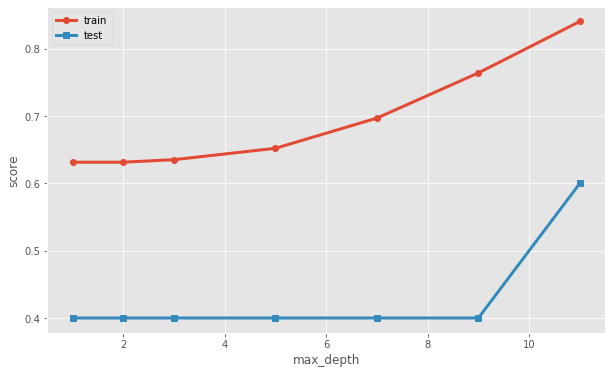

In [107]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_score, 'o-', linewidth=3, label='train')
plt.plot(max_depths, test_score, 's-', linewidth=3, label='test')
plt.xlabel('max_depth')
plt.ylabel('score')
# plt.ylim(0.85, 1.1)
plt.legend()

Let's do one more. What about the minimum numbers of samples required to make a node a leaf node?

We repeat the procedure from above:

In [108]:
train_score = []
test_score = []
min_samples = np.array([2, 4, 8, 16, 32])
for s in min_samples:
    dtc = tree.DecisionTreeClassifier(min_samples_leaf=s, random_state=42)
    dtc.fit(X_train, y_train)
    train_score.append(dtc.score(X_train, y_train))
    test_score.append(dtc.score(X_test, y_test))

This leads to a plot that looks quite different from the one before:

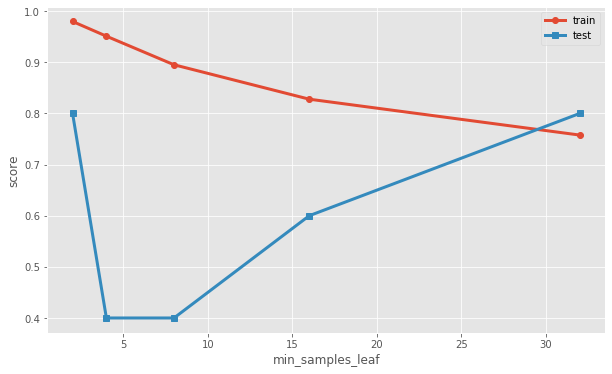

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(min_samples, train_score, 'o-', linewidth=3, label='train')
plt.plot(min_samples, test_score, 's-', linewidth=3, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('score')
# plt.ylim(0.9, 1)
plt.legend()

What does this all mean? Refer to Chapter 5 of the book for the answers.

# Random Forests

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(feats_tran, labels_tran)

In [116]:
clf.score(feats_tran, labels_tran)

0.98075

However, to our surprise, the test error is not too shabby, either:

In [117]:
clf.score(feats_test, labels_answer)

0.66

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [119]:
X, y = feats_tran, labels_tran

In [120]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.534875

In [121]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.59475

In [122]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999

False

In [123]:
scores

array([0.60625 , 0.601875, 0.59375 , 0.601875, 0.608125])

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

In [125]:
#X, y = load_iris(return_X_y=True)
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.6181249999999999